In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import seaborn as sns
from sklearn.metrics import accuracy_score

In [2]:
loan_dataset = pd.read_csv('./loan.csv')

In [3]:
loan_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
loan_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
print(loan_dataset.shape)

(614, 13)


In [6]:
print(loan_dataset.describe())

       ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
count       614.000000         614.000000  592.000000         600.00000   
mean       5403.459283        1621.245798  146.412162         342.00000   
std        6109.041673        2926.248369   85.587325          65.12041   
min         150.000000           0.000000    9.000000          12.00000   
25%        2877.500000           0.000000  100.000000         360.00000   
50%        3812.500000        1188.500000  128.000000         360.00000   
75%        5795.000000        2297.250000  168.000000         360.00000   
max       81000.000000       41667.000000  700.000000         480.00000   

       Credit_History  
count      564.000000  
mean         0.842199  
std          0.364878  
min          0.000000  
25%          1.000000  
50%          1.000000  
75%          1.000000  
max          1.000000  


In [7]:
print(loan_dataset['Loan_Status'].value_counts())

Loan_Status
Y    422
N    192
Name: count, dtype: int64


In [8]:
print(loan_dataset.isnull().sum())

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


In [9]:
loan_dataset['Gender'].value_counts()

Gender
Male      489
Female    112
Name: count, dtype: int64

In [10]:
loan_dataset['Gender'].fillna(value='Female',inplace=True)

In [11]:
print(loan_dataset.isnull().sum())

Loan_ID               0
Gender                0
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


In [13]:
loan_dataset['Married'].value_counts()
loan_dataset['Married'].fillna(value='No',inplace=True)
loan_dataset.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [16]:
loan_dataset['Credit_History'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 614 entries, 0 to 613
Series name: Credit_History
Non-Null Count  Dtype  
--------------  -----  
564 non-null    float64
dtypes: float64(1)
memory usage: 4.9 KB


In [17]:
loan_dataset['Credit_History'].value_counts()
loan_dataset['Credit_History'].fillna(value=0.0,inplace=True)
loan_dataset.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [18]:
loan_dataset['Self_Employed'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 614 entries, 0 to 613
Series name: Self_Employed
Non-Null Count  Dtype 
--------------  ----- 
582 non-null    object
dtypes: object(1)
memory usage: 4.9+ KB


In [20]:
loan_dataset['Self_Employed'].value_counts()
loan_dataset['Self_Employed'].fillna(value='Yes',inplace=True)
loan_dataset.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents           15
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [21]:
loan_dataset.dropna(inplace=True)

In [22]:
loan_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 566 entries, 1 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            566 non-null    object 
 1   Gender             566 non-null    object 
 2   Married            566 non-null    object 
 3   Dependents         566 non-null    object 
 4   Education          566 non-null    object 
 5   Self_Employed      566 non-null    object 
 6   ApplicantIncome    566 non-null    int64  
 7   CoapplicantIncome  566 non-null    float64
 8   LoanAmount         566 non-null    float64
 9   Loan_Amount_Term   566 non-null    float64
 10  Credit_History     566 non-null    float64
 11  Property_Area      566 non-null    object 
 12  Loan_Status        566 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 61.9+ KB


In [23]:
# Label Encoding
loan_dataset.replace({'Loan_Status':{'N':0,'Y':1}},inplace=True)


In [24]:
print(loan_dataset.head())

    Loan_ID Gender Married Dependents     Education Self_Employed  \
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   
5  LP001011   Male     Yes          2      Graduate           Yes   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   
5             5417             4196.0       267.0             360.0   

   Credit_History Property_Area  Loan_Status  
1             1.0         Rural            0  
2             1.0         Urban            1  
3             1.0

In [25]:
print(loan_dataset['Dependents'].value_counts())

Dependents
0     323
2      98
1      97
3+     48
Name: count, dtype: int64


In [26]:
loan_dataset = loan_dataset.replace(to_replace='3+',value=4)

In [27]:
loan_dataset['Dependents'].value_counts()

Dependents
0    323
2     98
1     97
4     48
Name: count, dtype: int64

<AxesSubplot:xlabel='Education', ylabel='count'>

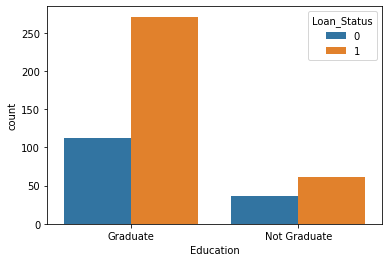

In [32]:
sns.countplot(x='Education',hue='Loan_Status',data=loan_dataset)

<Axes: xlabel='Married', ylabel='count'>

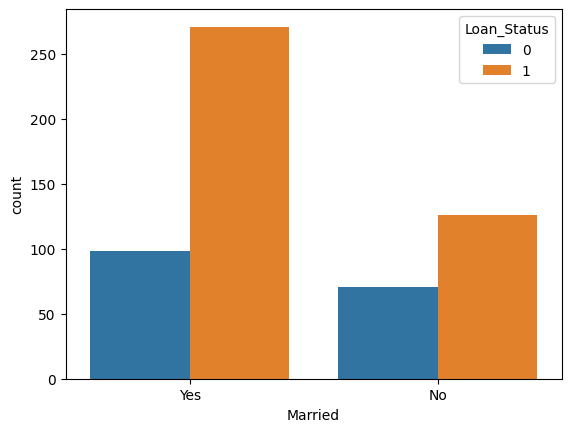

In [32]:
sns.countplot(x='Married',hue='Loan_Status',data=loan_dataset)

In [33]:
loan_dataset.replace({'Married':{'Yes':1,'No':0},'Gender':{'Male':1,'Female':0},'Self_Employed':{'No':0,'Yes':1},'Property_Area':{'Rural':0,'Semiurban':1,'Urban':2},'Education':{'Graduate':1,'Not Graduate':0}},inplace=True)

In [34]:
loan_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,1
5,LP001011,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,2,1


In [35]:
x= loan_dataset.drop(columns = ['Loan_ID','Loan_Status'],axis=1)
y = loan_dataset['Loan_Status']

In [36]:
x.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
1,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0
2,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2
3,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2
4,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2
5,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,2


In [37]:
y.head()

1    0
2    1
3    1
4    1
5    1
Name: Loan_Status, dtype: int64

In [38]:
x_train, x_test, y_train, y_test = train_test_split(x,y,stratify=y,test_size=0.1,random_state=2)

In [39]:
print(x.shape,x_train.shape,x_test.shape)

(566, 11) (509, 11) (57, 11)


In [40]:
classifier = SVC(kernel='linear')

In [41]:
classifier.fit(x_train,y_train)

SVC(kernel='linear')

In [42]:
x_train_predict = classifier.predict(x_train)
train_predict = accuracy_score(x_train_predict,y_train)
print(train_predict)

0.7347740667976425


In [43]:
x_test_predict = classifier.predict(x_test)
x_test_predict = accuracy_score(x_test_predict,y_test)
print(x_test_predict)

0.8070175438596491


In [44]:
#Predictive system
input_data = x_test
test_predict = classifier.predict(input_data)
print(test_predict)

[1 1 1 0 1 1 1 0 1 1 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0
 1 0 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1]


In [45]:
print(y_test)

90     1
135    0
189    1
541    0
496    1
592    1
609    1
162    0
439    1
333    1
450    0
607    1
237    1
133    1
207    1
613    0
210    0
64     0
92     1
378    0
585    0
233    1
83     0
337    1
351    0
411    1
193    1
14     1
169    1
536    1
382    1
555    1
527    1
315    1
312    1
294    1
556    1
482    1
250    0
221    1
150    0
249    1
348    1
579    1
22     0
256    0
40     0
540    1
557    1
327    1
68     1
244    1
465    1
8      1
416    0
38     1
85     1
Name: Loan_Status, dtype: int64
